In [41]:
import matplotlib.pyplot as plt
import numpy as np

In [42]:
all_grads = np.load(open("/scratch/yl1363/lanmt-ebm/analysis/all_grads.npy", "rb"))
print (all_grads.shape)
all_zs = np.load(open("/scratch/yl1363/lanmt-ebm/analysis/all_zs.npy", "rb"))
print (all_zs.shape)
targets = ['▁This', '▁is', '▁enormous', '.']
targets = ['<BOS>'] + targets + ["<EOS>"]

(15, 15, 6, 2)
(5, 6, 2)


In [43]:
targets_length = all_zs.shape[1]
print (targets_length)

6


In [44]:
z_diff = all_zs[-1] - all_zs[0]
z_diff_x = z_diff[:, 0]
z_diff_y = z_diff[:, 1]
z0 = all_zs[0] # [6, 2]

in_grid, out_grid = 10, 2
grid_size = in_grid + 2 * out_grid + 1
grid = np.linspace(-out_grid, in_grid+out_grid, in_grid+out_grid*2+1) / 10.0 # [grid_size]
print (grid)

[-0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1
  1.2]


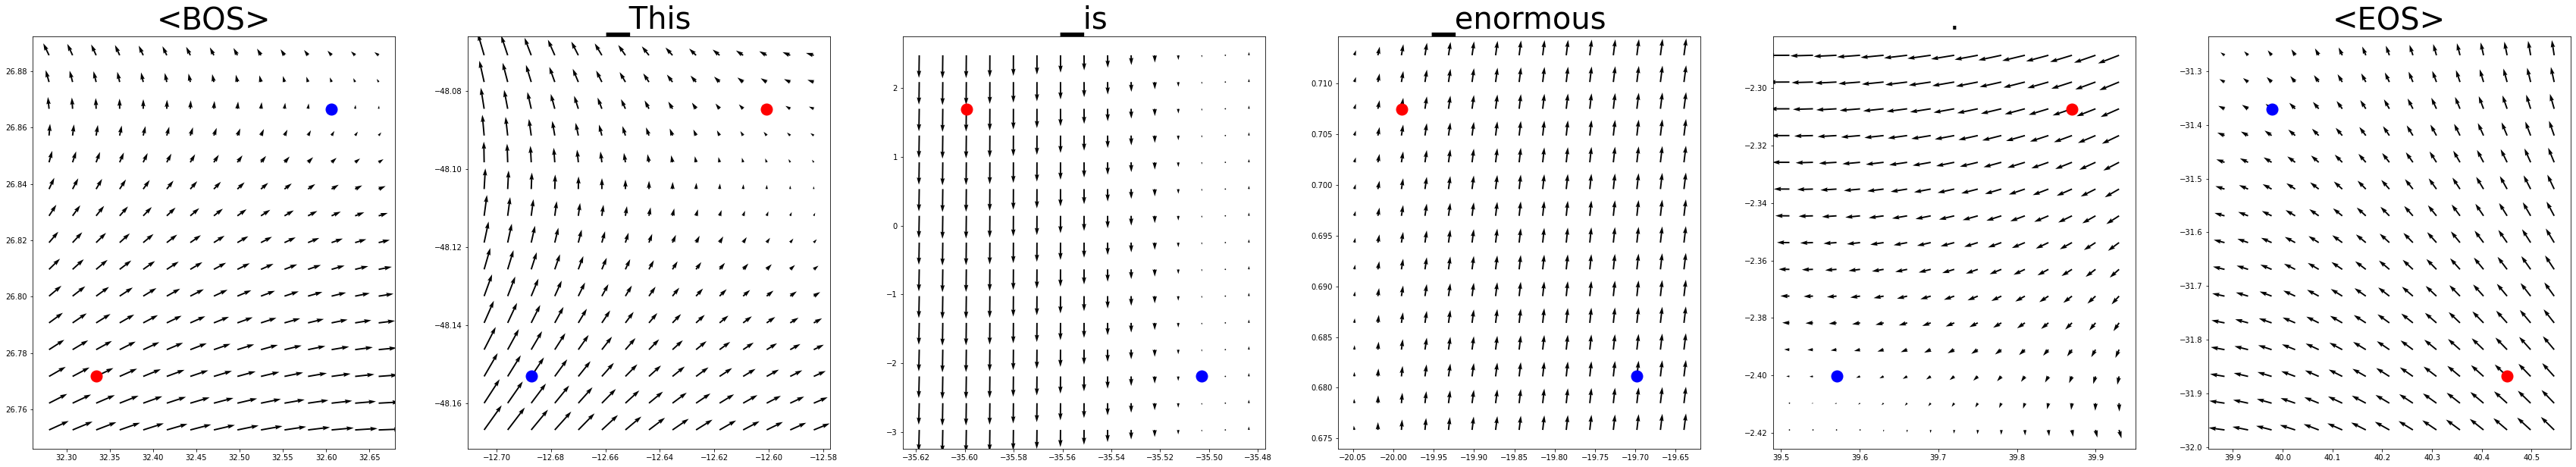

In [52]:
fig, axes = plt.subplots(ncols=targets_length, figsize=(10 * targets_length, 10))
for idx in range(targets_length):
    X = grid * z_diff_x[idx] + z0[idx, 0]
    Y = grid * z_diff_y[idx] + z0[idx, 1]
    U = all_grads[:, :, idx, 0] * 5
    V = all_grads[:, :, idx, 1] * 5

    q = axes[idx].quiver(X, Y, U, V)
    x = all_zs[:, idx, 0]
    y = all_zs[:, idx, 1]
    x0, y0 = x[0], y[0]
    xr, yr = x[1:], y[1:]
    axes[idx].set_title(targets[idx], fontsize=40)
    axes[idx].plot(x[0], y[0], 'o', color='red', markersize=15)
    axes[idx].plot(x[1], y[1], 'o', color='blue', markersize=15)

plt.show()